In [1]:
## Digits

In [2]:
from sklearn.datasets import load_digits
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from gympy.layers import Linear, Relu, Sigmoid, Softmax, Tanh
from gympy.networks import NeuralNetwork, DataSet
from gympy.optimizers import RMSprop
from gympy.loss import CategoricalCrossEntropy, Accuracy
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.model_selection import train_test_split


In [3]:
digits = load_digits()

In [4]:
X_train, X_test, y_train, y_test = train_test_split(digits.data, digits.target)
X_train.shape

(1347, 64)

In [5]:
Y = OneHotEncoder(sparse=False).fit_transform(y_train.reshape(-1,1)).T
Y.shape

(10, 1347)

In [6]:
X = StandardScaler().fit_transform(X_train).T
print(X.shape)


(64, 1347)


In [7]:

n_iter=390
model = NeuralNetwork(
    layers = [
        Tanh(n_input=64, n_output=32, dropout_rate=0.0),
        Softmax(n_input=32, n_output=10)
    ],
    optimizer = RMSprop(learning_rate=1e-2,momentum=0.9),
    loss = CategoricalCrossEntropy(),
    n_iter=n_iter
)

In [8]:
tt = model.forward(X[:,0:1])
tt

array([[0.10003199],
       [0.09864784],
       [0.10146469],
       [0.10042798],
       [0.10034863],
       [0.10008715],
       [0.10013378],
       [0.10007575],
       [0.098834  ],
       [0.0999482 ]])

In [9]:
yy = Y[:,0:1]
yy

array([[0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [1.],
       [0.]])

In [10]:
np.log(0.5)

-0.6931471805599453

In [11]:
CategoricalCrossEntropy().forward(tt, Y[:,0:1])

2.314313630571727

In [12]:

dataset = DataSet(
    x = X,
    y = Y,
    batch_size=64
)


In [13]:
for i in model.get_bias():
    print(i.shape)

(32, 1)
(10, 1)


<class 'gympy.optimizers.optimizers.RMSprop'>
0 cost 0.34532626581621945 iter 22
100 cost 5.781909150234908e-09 iter 2122
200 cost 2.417256861497499e-09 iter 4222
300 cost 1.5139888847294393e-09 iter 6322
400 cost 1.097009052826871e-09 iter 8422


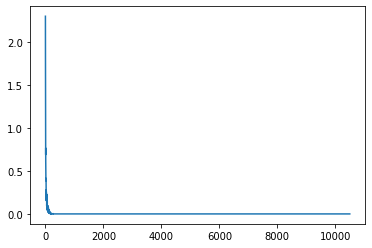

In [14]:
n_iter=5000
model.train_dataset(dataset, show=100, n_epochs=500)
plt.plot(model.cost)

In [15]:
model.forward(X[:,[453]])

array([[8.02766924e-14],
       [6.93634453e-21],
       [1.37049859e-18],
       [3.66799546e-11],
       [9.55328168e-23],
       [2.62452245e-14],
       [5.49036819e-24],
       [2.69221554e-18],
       [1.01135897e-15],
       [1.00000000e+00]])

In [16]:
test_idx = np.random.choice(X.shape[1],16, replace=False)

In [17]:
prob = model.forward(X[:,test_idx])
pred = np.argmax(prob,axis=0)

true_vals = np.argmax(Y[:,test_idx], axis=0)

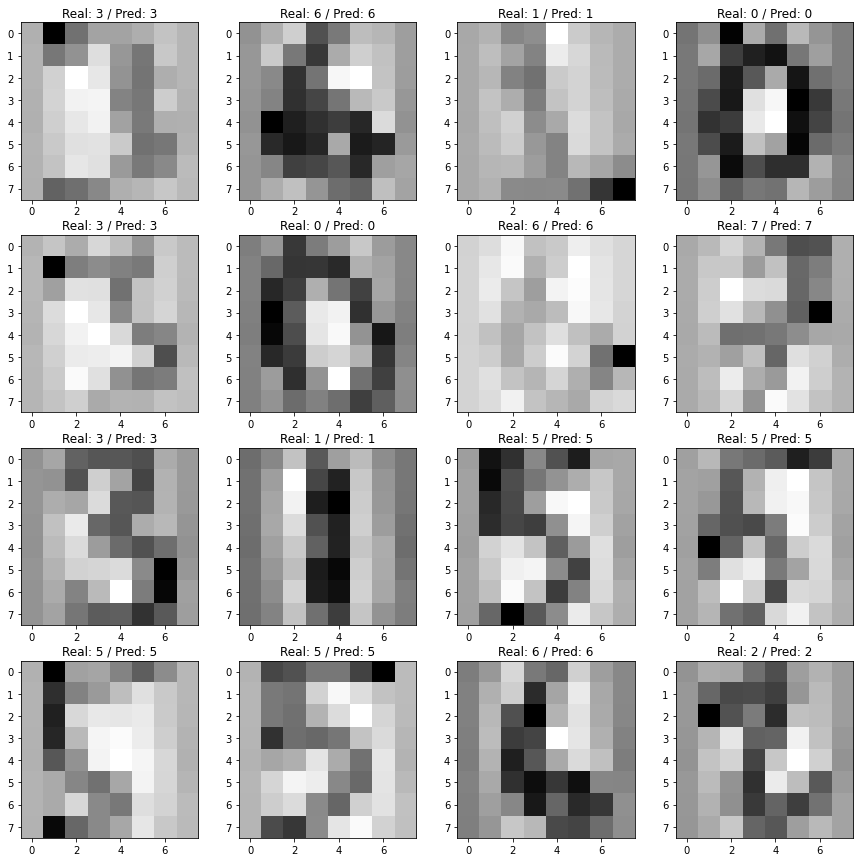

In [18]:
fig, axes = plt.subplots(4,4, figsize=(15,15))

for i,(idx, ax) in enumerate(zip(test_idx, axes.flatten())):
    ax.imshow(X[:,idx].reshape(8,8), cmap=plt.cm.gray_r, interpolation='nearest')
    ax.set_title(f'Real: {true_vals[i]} / Pred: {pred[i]}')

In [19]:
prob_total = model.forward(X)
pred_total = np.argmax(prob_total,axis=0)
true_vals_total = np.argmax(Y, axis=0)

acc = Accuracy()
acc.forward(prob_total, Y)

1.0